### Least Squares Regression

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Let us use Advertising data and see if we could predict sales based on the TV ads

In [0]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Let us build a Linear Regression utility class which fits a Linear regression model based on the data and return the prediction along with the features dataframe under 'predictions' as new column

In [0]:
class LinRegUtils(object):
  def std_units(self, x):
    return (x - np.mean(x))/np.std(x)

  def correlation(self, df, x, y):
    return np.mean(self.std_units(df[x])* self.std_units(df[y]))

  def slope(self, df, x, y):
    r = self.correlation(df, x, y)
    return r * np.std(df[y])/np.std(df[x])

  def intercept(self, df, x, y):
    m = self.slope(df, x, y)
    return np.mean(df[y]) - m * np.mean(df[x])

  def fitted_values(self, df, x, y):
    m = self.slope(df, x, y)
    c = self.intercept(df, x, y)
    print(f'slope = {m} ; intercept = {c}')
    df['predictions'] = m * df[x] + c
    return df

linear_reg = LinRegUtils()
fitted_df = linear_reg.fitted_values(df, 'TV', 'sales')


slope = 0.047536640433019736 ; intercept = 7.032593549127698


In [0]:
fitted_df.head()

,TV,radio,newspaper,sales,predictions
1,230.1,37.8,69.2,22.1,17.970775
2,44.5,39.3,45.1,10.4,9.147974
3,17.2,45.9,69.3,9.3,7.850224
4,151.5,41.3,58.5,18.5,14.234395
5,180.8,10.8,58.4,12.9,15.627218


### We see that the slope and intercept is obtained. We can use the scipy optimize function to see if this is the best fit line.

Compute the Root mean square error as a function, that we may want to minimize and obtain the best fit slope and intercept

In [0]:
def rmse(slope, intercept):
    x = df['TV']
    y = df['sales']
    fitted = slope*x + intercept
    return (np.mean((y - fitted) ** 2))**0.5

In [0]:
rmse(0.04, 7.03)

3.48756550046017

Below is a simple wrapper around scipy optimize.minimize function which accepts the rmse function as an argument and uses 'Powell' method to minimize and return us the best fit line (slope & intercept)

In [0]:
from scipy import optimize
import functools

def minimize(f, start=None, array=False, **vargs):
    """Minimize a function f of one or more arguments.

    Args:
        f: A function that takes numbers and returns a number

        start: A starting value or list of starting values

        vargs: Other named arguments passed to scipy.optimize.minimize

    Returns:
        an array of minimizing arguments of a multi-argument function
    """
    
    @functools.wraps(f)
    def objective(args):
        return f(*args)

    result = optimize.minimize(objective, start, **vargs)
    return result.x

In [0]:
minimize(rmse, method='Powell', start=[0.0, 4.0])

array([0.04753664, 7.03258745])

So we saw that Regression line is the one which minimizes the MSE / RMSE the most. 

Also by minimizing the MSE / RMSE, we will obtain the regression line which happens to be the best fit line.

### Hence the name least squares line 

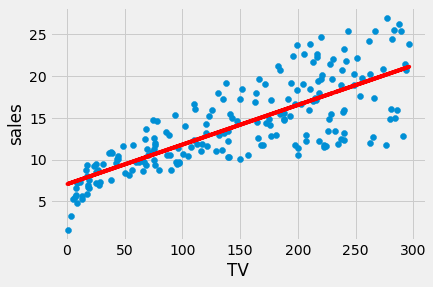

In [0]:
plt.scatter(fitted_df['TV'], fitted_df['sales'])
plt.plot(fitted_df['TV'], fitted_df['predictions'], color='red')
plt.xlabel('TV')
plt.ylabel('sales');